In [ ]:
# Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms
**Course**: Advanced Big Data and Data Mining (MSCS-634-B01)
**Term**: 2025 Summer - Second Bi-term
**Name**: Your Name
**Date**: July 2025


In [9]:
# Install sklearn-extra for KMedoids
!pip install -q scikit-learn-extra

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn_extra.cluster import KMedoids


In [5]:
from google.colab import files
uploaded = files.upload()


Saving mobile phone usage .csv to mobile phone usage .csv


In [10]:
# Load the dataset
df = pd.read_csv('mobile phone usage .csv', encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # remove trailing spaces
df.head()

,ï»¿name,slug,value,date_of_information,ranking,region
0,China,china,"1,810,000,000",2023,1,East and Southeast Asia
1,India,india,"1,140,000,000",2022,2,South Asia
2,United States,united-states,"386,000,000",2023,3,North America
3,Indonesia,indonesia,"352,000,000",2023,4,East and Southeast Asia
4,Russia,russia,"245,000,000",2022,5,Central Asia


In [13]:
# Remove formatting from numbers (commas) and convert to int
df['value'] = df['value'].str.replace(',', '').astype(int)

# Drop non-numeric or non-useful columns for clustering
X = df[['value', 'ranking']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df[['value_scaled', 'ranking_scaled']] = X_scaled
df.head()


,ï»¿name,slug,value,date_of_information,ranking,region,value_scaled,ranking_scaled
0,China,china,1810000000,2023,1,East and Southeast Asia,11.846013,-1.724370
1,India,india,1140000000,2022,2,South Asia,7.364181,-1.708974
2,United States,united-states,386000000,2023,3,North America,2.320449,-1.693578
3,Indonesia,indonesia,352000000,2023,4,East and Southeast Asia,2.093013,-1.678181
4,Russia,russia,245000000,2022,5,Central Asia,1.377258,-1.662785


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, df['kmeans_cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette)


K-Means Silhouette Score: 0.5917780261771406


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
kmedoids = KMedoids(n_clusters=3, random_state=42, method='alternate')
df['kmedoids_cluster'] = kmedoids.fit_predict(X_scaled)

kmedoids_silhouette = silhouette_score(X_scaled, df['kmedoids_cluster'])
print("K-Medoids Silhouette Score:", kmedoids_silhouette)


K-Medoids Silhouette Score: 0.48349349623593907


Text(0.5, 1.0, 'K-Means Clustering')

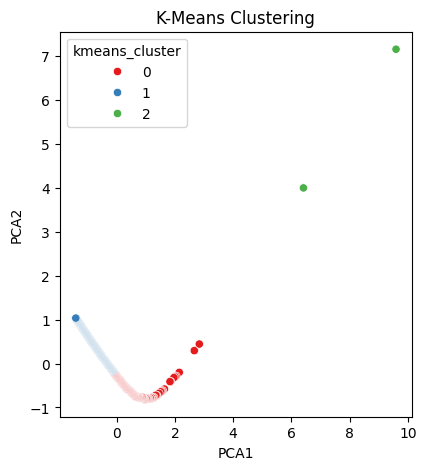

In [16]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='kmeans_cluster', palette='Set1')
plt.title("K-Means Clustering")


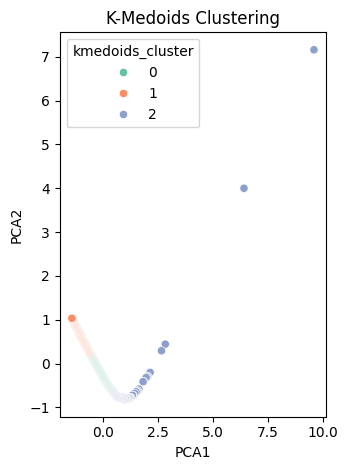

In [17]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='kmedoids_cluster', palette='Set2')
plt.title("K-Medoids Clustering")
plt.tight_layout()
plt.show()